# Zadanie 8

In [12]:
import random
import math

def akceptacjaOdrzucenieDyskretna(prawdopodobienstwa):
    n = len(prawdopodobienstwa)
    qi = 1/n
    c = max([pi/qi for pi in prawdopodobienstwa])
    while True:
        y = math.floor(n*random.random())
        u = random.random()
        if u <= prawdopodobienstwa[y]/(c*qi):
            return y

In [60]:
def generujAOD(praw, n = 10000):
    return [akceptacjaOdrzucenieDyskretna(praw) for _ in range(n)]

In [55]:
import matplotlib.pyplot as plt

def plotHist(data, n = 10000):
    bins = max(data) + 1
    plt.hist(data, density = True, bins = bins)
    plt.show()

In [93]:
import matplotlib.pyplot as plt
import numpy as np

def cummulativeDistribution(data, x):
    """ Counts value of empirical cummulative distribution of x. """
    return sum([1 for element in data if element < x])/len(data)

def plotECDF(data):
    dataToPlot = []
    n = len(data)
    zakres = np.linspace(1.1*min(data), 1.1*max(data), n)
    for i in zakres:
        temp = cummulativeDistribution(data, i)
        dataToPlot.append(temp)
    
    plt.scatter(zakres[1:-1], dataToPlot[:-2], s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(dataToPlot) - 1):
        x = [zakres[i], zakres[i+1]]
        y = [dataToPlot[i], dataToPlot[i]]
        plt.plot(x,y, color = 'k')
    plt.plot(zakres[-1], dataToPlot[-1])

In [94]:
praw = [1/10, 2/10, 1/20, 2/10, 1/20, 2/15, 2/15, 2/15]

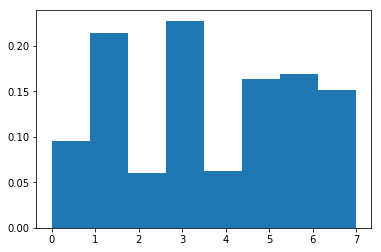

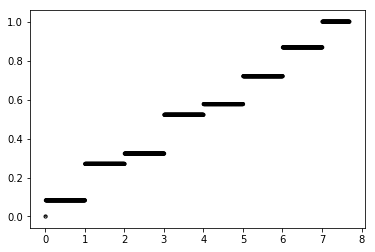

In [98]:
wyniki = generujAOD(praw, n = 1000)

plotHist(wyniki)

plotECDF(wyniki)
plt.show()

# Zadanie 10

In [171]:
from scipy.optimize import fmin, fminbound

def akceptacjaOdrzucenieCiagla(f, a, b, *args):
    M = f(fminbound(lambda x: -f(x, *args),a,b), *args)
    while True:
        u1 = random.uniform(a,b)
        u2 = random.uniform(0,M)
        if u2 <= f(u1, *args):
            return u1    

In [172]:
def generujAOC(f, a, b, n = 1000, *args):
    return [akceptacjaOdrzucenieCiagla(f, a, b, *args) for _ in range(n)]

In [173]:
def plotGestoscEmpiryczna(wyniki):
    plt.hist(wyniki, density = True)

In [180]:
def plotGestoscTeoretyczna(f, a, b, *args):
    x = np.linspace(a,b,100)
    y = [f(t, *args) for t in x]
    plt.plot(x, y)

In [181]:
from scipy.integrate import quad

def plotCDF(f, a, b, *args):
    zakres = np.linspace(a,b)
    wyniki = [quad(f,a,x, args = args)[0] for x in zakres]
    plt.plot(zakres,wyniki)

In [182]:
def testuj(f, a, b, *args, n = 1000):
    pierwszeWyniki = generujAOC(f, a, b, n, *args)
    
    plotGestoscEmpiryczna(pierwszeWyniki)
    plotGestoscTeoretyczna(f, a, b, *args)
    plt.title('Density')
    plt.show()
    
    plotECDF(pierwszeWyniki)
    plotCDF(f, a, b, *args)
    plt.title('ECDF vs. CDF')
    plt.show()
    
    print('Mean = ',np.mean(pierwszeWyniki))
    print('Std = ',np.std(pierwszeWyniki))

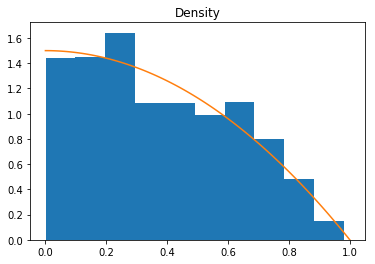

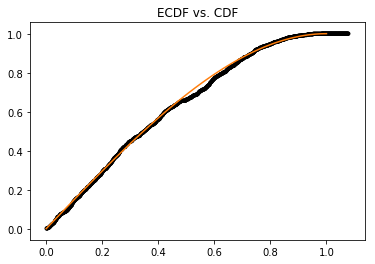

Mean =  0.381743610889
Std =  0.245536643549


In [185]:
def f(x):
    return 3*(1-x**2)/2

a = 0
b = 1
testuj(f,a,b)

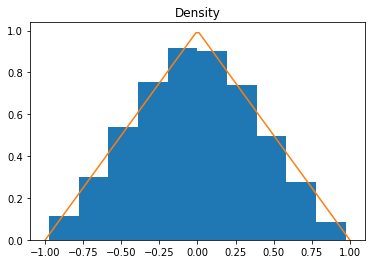

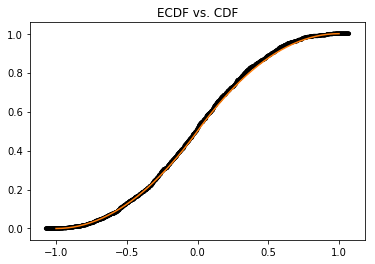

Mean =  -0.0130757804931
Std =  0.398171395483


In [204]:
def f(x,a,b,c):
    if x <= c:
        return 2*(x-a)/((b-a)*(c-a))
    else:
        return 2*(b-x)/((b-a)*(b-c))
    
a = -1
b = 1
c = 0
args = (a,b,c)
testuj(f,a,b,*args)

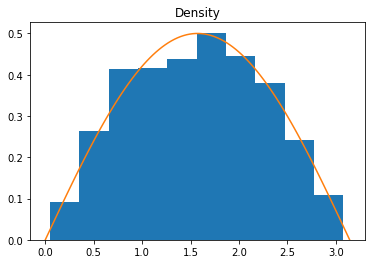

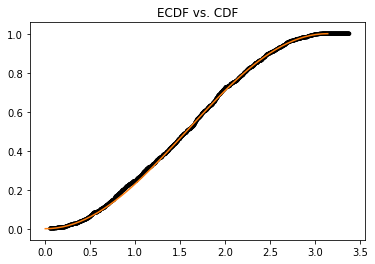

Mean =  1.55876344453
Std =  0.693065159609


In [187]:
def f(x):
    return np.sin(x)/2

a = 0
b = np.pi
testuj(f,a,b)

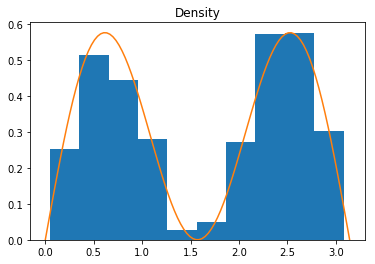

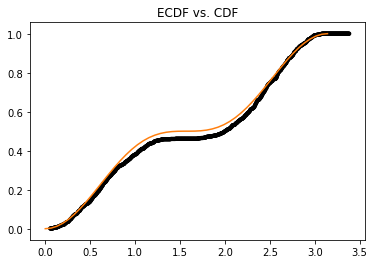

Mean =  1.63834139591
Std =  0.947143494699


In [188]:
def f(x):
    return 3*np.sin(x)*(np.cos(x))**2/2
a = 0
b = np.pi
testuj(f,a,b)

D:\Games\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


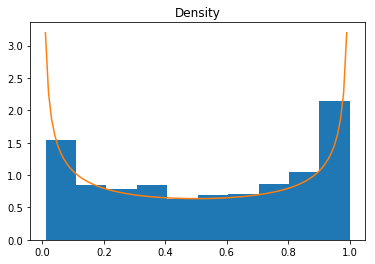

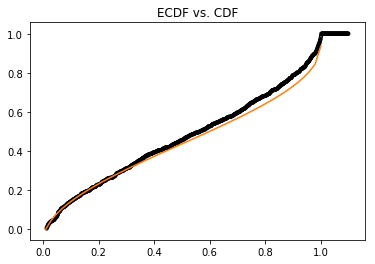

Mean =  0.54079338796
Std =  0.335064391989


In [189]:
from scipy.special import beta

def f(x, a, b):
    return x**(a-1)*(1-x)**(b-1)/beta(a,b)

a = 0.01
b = 1
args = (0.5, 0.5)
testuj(f, a, b, *args)